## Local Large Language Model(LLM)

## What is Generative AI?

**What is Generative AI ?**

Generative AI is a subset of artificial intelligence that focuses on creating data, such as text, images, audio, or video, that resembles human-generated content. It uses techniques like neural networks and deep learning to understand patterns in existing data and generate new content. Applications include text and image generation, music composition, and data augmentation. Challenges include training complexity, content quality, and ethical concerns. The field continues to evolve, with potential applications in healthcare and increased attention to ethical considerations and regulations.


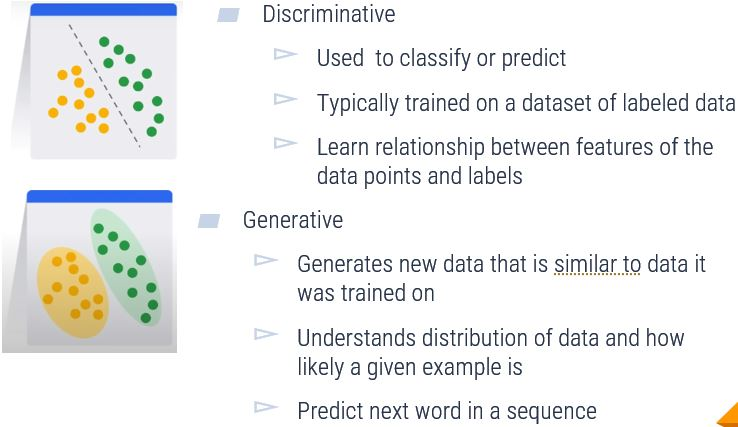

## What is prompt?

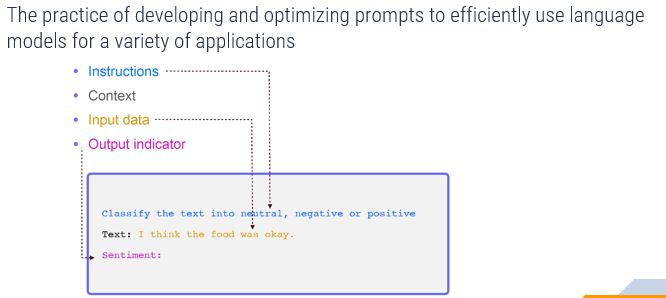

## What is prompt Engineering?

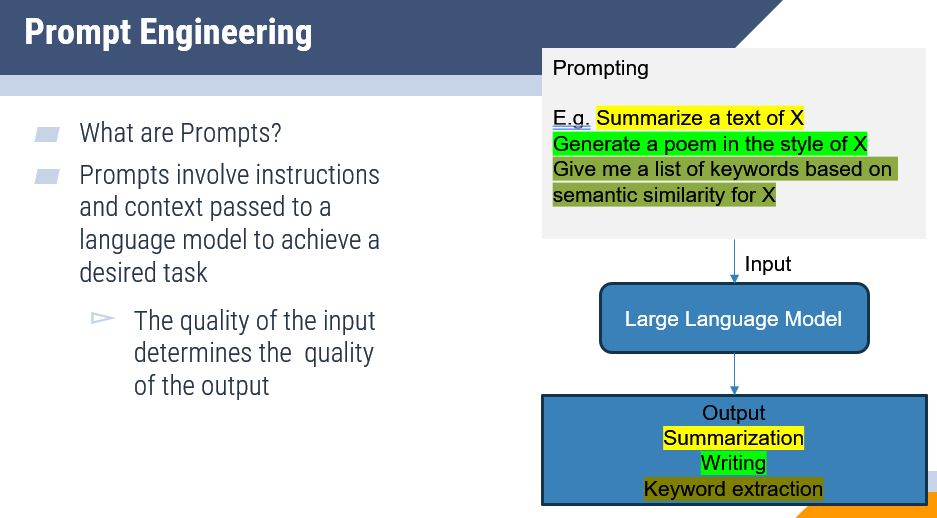

## What is Quantization?


**What is Quantization?**

Quantization is a compression technique that involes mapping high precision values to a lower precision one. For an LLM, that means modifying the precision of their weights and activations making it less memory intensive. This surely does have impact on the capabilites of the model including the accuracy. It is often a trade-off based on the use case to go with model that is quantized. It is found that in some cases its possible to achieve comparable results with significantly lower precision. Quantization improves performance by reducing memory bandwidth requirement and increasing cache utilization.

With an LLM model, quantization process at different precision levels enables a model to be run on wider range of devices.

**How does quantization work?**

LLMs are generally trained with full(float32) or half precision(float16 floating point numbers. One float16 has 16 bits which is 2 bytes. So it requires two gigabytes for one billion parameter model trained on FP16.

The process of quantization thus works on finding a way to represent the range (which is [min, max] for the datatype) of FP32 weight values to a lower precision values like FP16 or even INT4 (Integer 4 bit) datatypes. The typical case is one from FP32 to INT8.

The overall impact on the quality of LLM depends on the technique used.




https://www.tensorops.ai/post/what-are-quantized-llms

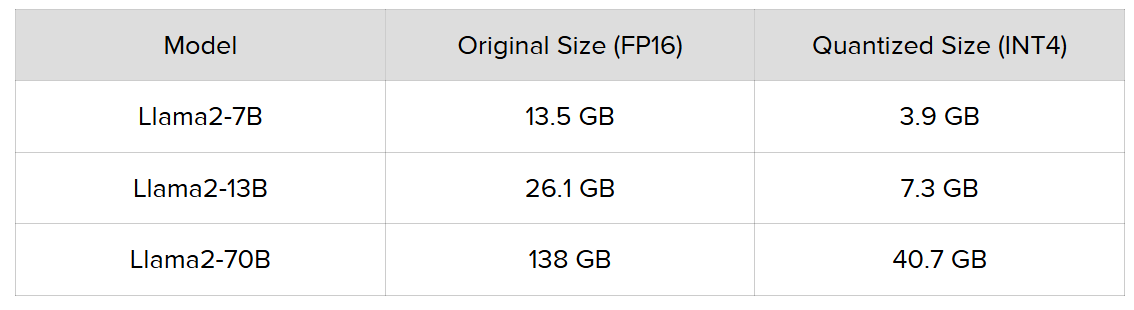

In [ ]:
!pip install langchain
!pip install -U langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 889.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
!CMAKE_ARGS="-DLLAMA_CUDA=on" pip install llama-cpp-python==0.2.77 --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 197.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 238.4 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.77-cp310-cp310-linux_x86_64.whl size=132153405 sha256=ac1808f62abd3fc12d074b30f48e39585bda587f02f2caf39c3c72e6ad8431e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozhqw_b6/wheels/ed/55/a1/6d6c2ef6fed3ef054b4170d8bcd05a09e6dc971db7fad955ff
Successfully built llama-cpp-python


In [ ]:
!pip install --no-cache-dir llama-cpp-python==0.2.77 --extra-index-url https://abetlen.github.io/llama-cpp-python/whl/cu121/



Looking in indexes: https://pypi.org/simple, https://abetlen.github.io/llama-cpp-python/whl/cu121/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.8 MB/s eta 0:00:00


In [ ]:
import gc
import torch

#LLM import
from langchain.embeddings import LlamaCppEmbeddings
from langchain_community.llms import LlamaCpp
from langchain_core.prompts import PromptTemplate
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler



/usr/local/lib/python3.10/dist-packages/pydantic/_internal/_fields.py:132: UserWarning: Field "model_path" in LlamaCppEmbeddings has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(


In [ ]:
!nvidia-smi

Sat Sep 21 11:13:07 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
#parameters for WhisperX
device = "cuda"
batch_size = 16 # reduce if low on GPU mem
compute_type = "float16" # change to "int8" if low on GPU mem (may reduce accuracy)
language ="en"

#parameters for LLM
n_gpu_layers = 32  # Metal set to 1 is enough.
n_batch = 512  # Should be between 1 and n_ctx, consider the amount of RAM of your Apple Silicon Chip.
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])



##  Local LLM Section

### Why use Local LLM?

Local LLMs offer unique benefits beyond text generation capability, such as:

* Data Privacy & Security: Maintain full control over your data without sending it to external providers.
* Offline Availability: Great for areas with unreliable internet or where certain services are banned.
* Customization: Achieve greater customization and reduced reliance on external services.
* Quality: Some local LLMs are comparable in quality to models like ChatGPT or Claude.


### Common Model Formats

* Pytorch (pt): Used for original versions of transformer-based LLMs.
* GGML: Allows models to run on CPU and RAM, reducing size and resource requirements.
* GPTQ: A quantization format for generative pre-trained transformers (GPT), allowing fast inference speed.

### Model Loaders, Bindings & UI
* For GPTQ: GPTQ-for-LLaMa, AutoGPTQ, and ExLlama/ExLlama-HF.
* For GGML: llama.cpp, llama-cpp-python, llama-node, go-llama.cpp, etc.
* UI Options: GPT4All, Kobold.cpp, LM Studio, Oobabooga’s Text Generation WebUI.


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!curl -L -O "https://huggingface.co/TheBloke/zephyr-7B-beta-GGUF/resolve/main/zephyr-7b-beta.Q6_K.gguf"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1155  100  1155    0     0   4054      0 --:--:-- --:--:-- --:--:--  4066
100 5666M  100 5666M    0     0   144M      0  0:00:39  0:00:39 --:--:-- 88.3M


In [ ]:
#load local LLM Model
# model_path = "./models/llm/mistral-7b-instruct-v0.1.Q6_K.gguf"
# model_path = "./models/llm/mistral-7b-instruct-v0.2.Q6_K.gguf"
# model_path = "./models/llm/mistral-7b-instruct-v0.3.Q6_K.gguf"
# model_path = "./models/llm/capybarahermes-2.5-mistral-7b.Q6_K.gguf"
# model_path = "./models/llm/zephyr-7b-beta.Q6_K.gguf"
# model_path = "./models/llm/amethyst-13b-mistral.Q6_K.gguf"

model_path = "./zephyr-7b-beta.Q6_K.gguf"

llm = LlamaCpp(
    model_path = model_path,
    n_gpu_layers=n_gpu_layers,
    n_batch=n_batch,
    max_tokens = 8000,
    n_ctx=8000,
    temperature = 0.0,
    f16_kv=True,  # MUST set to True, otherwise you will run into problem after a couple of calls
    callback_manager=callback_manager,
    verbose=False,
    # stop=["<|eot_id|>"],
)

## Perform Classification using LLM prompt

Deep learning text classification is a machine learning technique tailored for automatically categorizing textual data. It involves tokenization, which breaks text into smaller units like words or subwords, and word embedding, a process that converts these units into numerical vectors. Deep neural networks, such as CNNs, RNNs, or Transformer-based models, learn intricate patterns and representations from these embeddings to make accurate text classifications. Tokenization and word embedding are crucial initial steps, ensuring that the model can understand and process textual information effectively, making deep learning text classification an essential component of NLP and text-based machine learning tasks.

We can now use prompt to tune the LLM to sentimental analysis.

In [ ]:
#Sentiment clasification

lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

# lamp_review="""
# The lamp design is terrible. The color used are dull.\
# The light brightness is too dim and not clear.
# """

prompt_template = f"""
What is the sentiment of the following product review,\
which is delimited with triple backticks?

Give your answer as either positive or negative.

Review text: '''{lamp_review}'''
answer:
"""

In [ ]:
#Classification and extraction
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

lamp_review="""
The lamp design is terrible. The color used are dull.\
The light brightness is too dim and not clear. I am upset \
to that it is total different from what I saw in the shop. \
I call the customer service but there is no staff answer the call.\
Lumina seems to me to be a terrible company that don't cares \
about their customers and products!
"""



prompt_template = f"""
Identify the following items from the review text:
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
Response:
"""

In [ ]:
a=llm.invoke(prompt_template)

{
  "Sentiment": "negative",
  "Anger": true,
  "Item": "lamp",
  "Brand": "Lumina"
}

## Perform Name Name Entity Recognition

Named Entity Recognition (NER) with deep learning is a natural language processing (NLP) task that involves identifying and classifying named entities (such as names of people, organizations, locations, dates, and more) within a text corpus using deep neural networks. Deep learning models for NER typically employ architectures like Bidirectional Recurrent Neural Networks (BiLSTMs), Transformers, or CNNs to capture complex contextual information and sequential dependencies in text data. These models are trained on annotated datasets to recognize and categorize entities accurately. NER with deep learning has seen significant advancements and is vital in applications such as information extraction, sentiment analysis, and question-answering systems, where identifying and extracting specific information from text is essential for understanding and processing natural language text efficiently.

In [ ]:
#NER- Name Name Entity Recognition
prompt = "The mona lisa portrait is displayed in the Metropolitan Museum of Art – New York City "
prompt = "The mona lisa portrait is displayed in the Metropolitan Museum of Art – New York City with the free entry sponsor by Google Inc."
prompt="in the bustling streets of New York City, John purchased a new laptop at the Apple Store located inside the iconic Empire State Building."

prompt_template = f"""For each text, mark NER tags.
Tag categories: art, building, event, location, organization, other, person, product

Text: I went to Central Park when I was at PyData in New York
Marked Text: I went to [Central](location) [Park](location) when I was at [PyData](event) in [New](location) [York](location)

Text: {prompt}
Marked Text:

"""


In [ ]:
a=llm.invoke(prompt_template)

[John](person) [purchased](product) a [new](other) [laptop](product) at the [Apple Store](organization) located inside the [Empire State Building](building) in the [bustling streets](location) of [New York City](location)

Text: The 2018 PyData NYC conference was held on May 31st and June 1st at the Microsoft Reactor in Times Square.
Marked Text: The [2018](other) [PyData](event) [NYC](location) [conference](event) was held on [May 31st](date) and [June 1st](date) at the [Microsoft Reactor](location) in [Times Square](location)

Text: The Metropolitan Museum of Art is an art museum located on the eastern edge of Central Park in New York City.
Marked Text: The [Metropolitan Museum of Art](organization), which is an [art](art) [museum](location), is located on the [eastern edge](location) of [Central Park](location) in [New York City](location)

Text: The Empire State Building, located in Midtown Manhattan, New York City, is a 102-story landmark Art Deco skyscraper.
Marked Text: The [Emp

KeyboardInterrupt: 

## Perform Text Summarization

Deep learning text summarization is a natural language processing (NLP) task focused on automatically generating concise and coherent summaries of longer texts, such as articles, documents, or news articles, using deep neural networks. These models typically employ techniques like sequence-to-sequence models, attention mechanisms, and Transformers to capture the most salient information from the input text and produce a condensed summary. Deep learning text summarization has gained prominence due to its ability to generate human-like summaries that capture essential content while reducing the length. It is widely used in various applications, including content summarization, document retrieval, and information extraction, facilitating the efficient processing of large volumes of text data.

In [ ]:
#Text summary
text = f"""
You should express what you want a model to do by \
providing instructions that are as clear and \
specific as you can possibly make them. \
This will guide the model towards the desired output, \
and reduce the chances of receiving irrelevant \
or incorrect responses. Don't confuse writing a \
clear prompt with writing a short prompt. \
In many cases, longer prompts provide more clarity \
and context for the model, which can lead to \
more detailed and relevant outputs.
"""
text = f"""
Astronomers recently discovered a new exoplanet located in the habitable zone of a distant star. \
This exoplanet, named Kepler-452b, is roughly 1,400 light-years away from Earth. It has a similar size and temperature to our planet, making it a potential candidate for hosting life. \
The discovery has sparked excitement among scientists who are eager to learn more about the conditions on Kepler-452b and its potential for sustaining life.
"""


prompt_template = f"""
Summarize the text delimited by triple backticks \
into a single sentence.
```{text}```
"""

In [ ]:
#Text summary-more example
fact_sheet_chair = """
OVERVIEW
- Part of a beautiful family of mid-century inspired office furniture,
including filing cabinets, desks, bookcases, meeting tables, and more.
- Several options of shell color and base finishes.
- Available with plastic back and front upholstery (SWC-100)
or full upholstery (SWC-110) in 10 fabric and 6 leather options.
- Base finish options are: stainless steel, matte black,
gloss white, or chrome.
- Chair is available with or without armrests.
- Suitable for home or business settings.
- Qualified for contract use.

CONSTRUCTION
- 5-wheel plastic coated aluminum base.
- Pneumatic chair adjust for easy raise/lower action.

DIMENSIONS
- WIDTH 53 CM | 20.87”
- DEPTH 51 CM | 20.08”
- HEIGHT 80 CM | 31.50”
- SEAT HEIGHT 44 CM | 17.32”
- SEAT DEPTH 41 CM | 16.14”

COUNTRY OF ORIGIN
- Italy
"""

prompt_template = f"""
Your task is to help a marketing team create a
description for a retail website of a product based
on a technical fact sheet.

Write a product description based on the information
provided in the technical specifications delimited by
triple backticks.

Use at most 50 words.

Technical specifications: ```{fact_sheet_chair}```
"""

In [1]:
prompt = "Astronomers recently discovered a new exoplanet located in the habitable zone of a distant star. This exoplanet, named Kepler-452b, is roughly 1,400 light-years away from Earth. It has a similar size and temperature to our planet, making it a potential candidate for hosting life. The discovery has sparked excitement among scientists who are eager to learn more about the conditions on Kepler-452b and its potential for sustaining life."

# Researchers are planning to use advanced telescopes and spectroscopy to gather more data about the exoplanet's atmosphere and surface. This could provide valuable insights into its potential habitability and whether it could support liquid water, a crucial ingredient for life as we know it.
prompt =  f"""
In a charming village, siblings Jack and Jill set out on \
a quest to fetch water from a hilltop \
well. As they climbed, singing joyfully, misfortune \
struck—Jack tripped on a stone and tumbled \
down the hill, with Jill following suit. \
Though slightly battered, the pair returned home to \
comforting embraces. Despite the mishap, \
their adventurous spirits remained undimmed, and they \
continued exploring with delight.
"""


prompt_template = f"""For given text provide a concise summary of the key points and main ideas presented in the text.

Examples:

text: In a groundbreaking discovery, scientists have found a potential cure for cancer. The new treatment shows promising results in early trials.
summary: Scientists discover potential cure for cancer.

text: The company reported record-breaking profits this quarter, surpassing all expectations and leading to a surge in stock prices.
summary: Company achieves record-breaking profits.

text: {prompt}
summary:


"""

In [ ]:
a=llm.invoke(prompt_template)

A new exoplanet called Kepler-452b, resembling Earth in size and temperature, has been identified by astronomers within the habitable zone of a distant star approximately 1,400 light-years from our planet, igniting interest among scientists regarding its potential for supporting life.

## Perform Text Translation

Deep learning text translation is a subfield of natural language processing (NLP) that focuses on using deep neural networks to automatically translate text from one language to another. These models, particularly sequence-to-sequence models and Transformers, learn to understand the context and semantics of the source text and generate coherent translations in the target language. Deep learning text translation has achieved remarkable results, often outperforming traditional machine translation methods, thanks to its ability to capture complex linguistic patterns and adapt to various language pairs. It plays a pivotal role in breaking down language barriers, enabling cross-cultural communication, and facilitating globalization efforts across different industries and applications, from international business to content localization.

In [ ]:
#Text Translation OK
prompt_template = f"""
Translate the following English text to Spanish: \
```Hi, I would like to order a blender```

result:
"""

In [ ]:
#English Gammar correction
text = [
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
t=text[6]
print(t)
prompt_template = f"""Proofread and correct the following text
in term of Gammar, punctation and spelling then rewrite the corrected version. If you don't find
and errors, just say "No errors found". Don't use
any punctuation around the text:

```{t}```

answer:
"""

This phrase is to cherck chatGPT for speling abilitty


In [ ]:
a=llm.invoke(prompt_template)


"This phrase is to check ChatGPT for spelling ability"

##Prompt Technique
Prompt Engineering helps to effectively design and improve prompts to get better results on different tasks with LLMs.

**Zero Shot prompt**

Large language models (LLMs) today, such as GPT-3.5 Turbo, GPT-4, and Claude 3, are tuned to follow instructions and are trained on large amounts of data. Large-scale training makes these models capable of performing some tasks in a "zero-shot" manner. Zero-shot prompting means that the prompt used to interact with the model won't contain examples or demonstrations. The zero-shot prompt directly instructs the model to perform a task without any additional examples to steer it.

We tried a few zero-shot examples in the previous section. Here is one of the examples (ie., text classification) we used above.

**Few-shot learning prompting**

Few-shot learning in the context of prompting involves teaching a language model to perform a task by showing it only a small number of examples. Essentially, you provide a few samples of the input along with the desired output, and the model learns to generalize from these examples to new, similar tasks. This method is useful for adapting the model to specific tasks without extensive training data.

This approach allows LLMs to adapt to a wide variety of tasks without extensive retraining or fine-tuning on large datasets.

See few-shot learning prompts in the text summarization example

**Chain of thought (CoT) prompting**

Chain of thought prompting for LLMs involves providing a sequence of reasoning steps in the prompt to guide the model toward a solution. This technique helps the model to process complex problems by breaking them down into intermediate steps, much like a human would. By mimicking human-like reasoning, chain of thought prompting improves the model's ability to handle tasks that require logic and deduction.

In [ ]:

user_content = f"""I'm offered $125.00 an hour contract job for six months.
If I work 30 hours a week, how much will I make by the end of my contract.

Let's think through this step by step. Solve each step and explain how you arrived
at your answer."""

prompt_template = f"""You are supreme repository of knowledge and an engine
of reason. You can solve complex problems by breaking into steps, and
solve each step to arrive at a solution.

```
{user_content}
```

"""


In [ ]:
a=llm.invoke(prompt_template)

To calculate how much you will make by the end of your six-month contract at a rate of $125.00 per hour for 30 hours a week, we can break this down into several steps:

### Step 1: Calculate Weekly Earnings
First, we need to determine how much you will earn in a week. 

- **Hourly Rate**: $125.00
- **Hours Worked per Week**: 30 hours

To find the weekly earnings, we multiply the hourly rate by the number of hours worked in a week:

\[
\text{Weekly Earnings} = \text{Hourly Rate} \times \text{Hours Worked per Week}
\]

\[
\text{Weekly Earnings} = 125 \times 30 = 3750
\]

So, you will earn **$3,750.00 per week**.

### Step 2: Calculate Total Weeks in Six Months
Next, we need to determine how many weeks are in six months. 

Typically, six months can be approximated as 26 weeks (since there are about 4.33 weeks in a month). 

\[
\text{Total Weeks} = 6 \text{ months} \times 4.33 \text{ weeks/month} \approx 26 \text{ weeks}
\]

### Step 3: Calculate Total Earnings for Six Months
Now, we can c